In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
%matplotlib inline

from bams.example_systems import *
from bams.bayes_adaptor import BayesAdaptor 
from bams import convergence_analysis_tools as ctools

# Exploring the convergence of BAMS for 1D harmonic oscillator

The system has 10 states with standard deviations from 1 to 500. This notebook explores whether subsampling the simulation results in faster convergence of BAMS.

In [2]:
# Generating SAMS results
niterations = 1000
repeats = 500
sigmas = ctools.gen_optimal_sigmas(s_min=1, s_max=500, N=10)

rb_mse = np.zeros((repeats,niterations))
for r in range(repeats):
    rb_mse[r,:] = ctools.rb_mse_gaussian(sigmas, niterations)    

binary_mse = np.zeros((repeats,niterations))
for r in range(repeats):
    binary_mse[r,:] = ctools.binary_mse_gaussian(sigmas, niterations)

## Thompson sampling vs SAMS

Loading the simulation data. The folder naming scheme `X_moves/out.npy` means `X` simulation steps have been made before a BAMS adaption step has been made.

In [3]:
thompson1_mse = np.load('thompson_s1-500_n10/1_moves/out.npy')
thompson2_mse = np.load('thompson_s1-500_n10/2_moves/out.npy')
thompson5_mse = np.load('thompson_s1-500_n10/5_moves/out.npy')
thompson10_mse = np.load('thompson_s1-500_n10/10_moves/out.npy')
thompson20_mse = np.load('thompson_s1-500_n10/20_moves/out.npy')

Some of the `Thompson, step=1` did not complete. So finding where they didn't and removing the data.

In [4]:
last = np.where(np.mean(thompson1_mse, axis=1) == 0.0)[0][0]

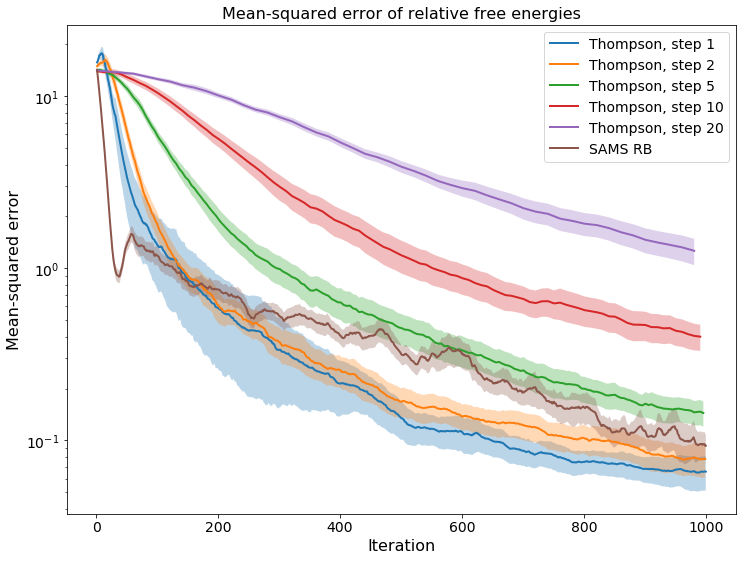

In [16]:
# Plotting parameters
alpha = 0.3           # The transparency of the spread
plt.figure(figsize=(12,9))

# Thompson 1 step
t = np.arange(1, niterations + 1)
standard_error = 2.0 * np.std(thompson1_mse[0:last,:], axis=0) / np.sqrt(thompson1_mse.shape[0])
mu = np.mean(thompson1_mse[0:last,:], axis=0)
upper = np.absolute(mu + standard_error)
lower = np.absolute(mu - standard_error)
plt.semilogy(t, mu, lw=2, label='Thompson, step 1')
plt.fill_between(t, lower, upper, alpha=alpha)

# Thompson 2 step
t = np.arange(1, niterations + 1, 2)
standard_error = 2.0 * np.std(thompson2_mse, axis=0) / np.sqrt(thompson2_mse.shape[0])
mu = np.mean(thompson2_mse, axis=0)
upper = mu + standard_error
lower = mu - standard_error
plt.semilogy(t, mu, lw=2, label='Thompson, step 2')
plt.fill_between(t, lower, upper, alpha=alpha)

# Thompson 5 step
t = np.arange(1, niterations + 1, 5)
standard_error = 2.0 * np.std(thompson5_mse, axis=0) / np.sqrt(thompson5_mse.shape[0])
mu = np.mean(thompson5_mse, axis=0)
upper = mu + standard_error
lower = mu - standard_error
plt.semilogy(t, mu, lw=2, label='Thompson, step 5')
plt.fill_between(t, lower, upper, alpha=alpha)

# Thompson 10 step
t = np.arange(1, niterations + 1, 10)
standard_error = 2.0 * np.std(thompson10_mse, axis=0) / np.sqrt(thompson10_mse.shape[0])
mu = np.mean(thompson10_mse, axis=0)
upper = mu + standard_error
lower = mu - standard_error
plt.semilogy(t, mu, lw=2, label='Thompson, step 10')
plt.fill_between(t, lower, upper, alpha=alpha)

# Thompson 20 step
t = np.arange(1, niterations + 1, 20)
standard_error = 2.0 * np.std(thompson20_mse, axis=0) / np.sqrt(thompson20_mse.shape[0])
mu = np.mean(thompson20_mse, axis=0)
upper = mu + standard_error
lower = mu - standard_error
plt.semilogy(t, mu, lw=2, label='Thompson, step 20')
plt.fill_between(t, lower, upper, alpha=alpha)

# SAMS RB
t = np.arange(1, niterations + 1)
standard_error = 2.0 * np.std(rb_mse, axis=0) / np.sqrt(rb_mse.shape[0])
mu = np.mean(rb_mse, axis=0)
upper = mu + standard_error
lower = mu - standard_error
plt.semilogy(t, mu, lw=2, label='SAMS RB')
plt.fill_between(t, lower, upper, alpha=alpha)

#plt.set_figheight(8)
#plt.set_figwidth(10)

plt.title('Mean-squared error of relative free energies', fontsize=16)
plt.ylabel('Mean-squared error', fontsize=16)
plt.xlabel('Iteration', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14)
plt.show()

In [18]:
map1_mse = np.load('map_s1-500_n10/1_moves/out.npy')
map2_mse = np.load('map_s1-500_n10/2_moves/out.npy')
map5_mse = np.load('map_s1-500_n10/5_moves/out.npy')
map10_mse = np.load('map_s1-500_n10/10_moves/out.npy')
map20_mse = np.load('map_s1-500_n10/20_moves/out.npy')

In [19]:
last = np.where(np.mean(map1_mse, axis=1) == 0.0)[0][0]

## MAP estimates vs SAMS

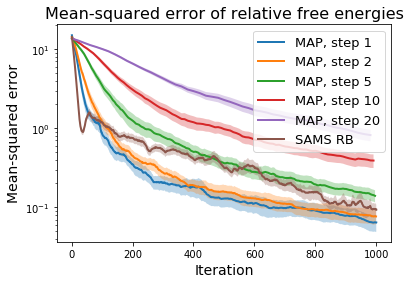

In [20]:
# Plotting parameters
alpha = 0.3           # The transparency of the spread

# MAP 1 step
t = np.arange(1, niterations + 1)
standard_error = 2.0 * np.std(map1_mse[0:last,:], axis=0) / np.sqrt(map1_mse.shape[0])
mu = np.mean(map1_mse[0:last,:], axis=0)
upper = np.absolute(mu + standard_error)
lower = np.absolute(mu - standard_error)
plt.semilogy(t, mu, lw=2, label='MAP, step 1')
plt.fill_between(t, lower, upper, alpha=alpha)

# MAP 2 step
t = np.arange(1, niterations + 1, 2)
standard_error = 2.0 * np.std(map2_mse, axis=0) / np.sqrt(map2_mse.shape[0])
mu = np.mean(map2_mse, axis=0)
upper = mu + standard_error
lower = mu - standard_error
plt.semilogy(t, mu, lw=2, label='MAP, step 2')
plt.fill_between(t, lower, upper, alpha=alpha)

# MAP 5 step
t = np.arange(1, niterations + 1, 5)
standard_error = 2.0 * np.std(map5_mse, axis=0) / np.sqrt(map5_mse.shape[0])
mu = np.mean(map5_mse, axis=0)
upper = mu + standard_error
lower = mu - standard_error
plt.semilogy(t, mu, lw=2, label='MAP, step 5')
plt.fill_between(t, lower, upper, alpha=alpha)

# MAP 10 step
t = np.arange(1, niterations + 1, 10)
standard_error = 2.0 * np.std(map10_mse, axis=0) / np.sqrt(map10_mse.shape[0])
mu = np.mean(map10_mse, axis=0)
upper = mu + standard_error
lower = mu - standard_error
plt.semilogy(t, mu, lw=2, label='MAP, step 10')
plt.fill_between(t, lower, upper, alpha=alpha)

# MAP 20 step
t = np.arange(1, niterations + 1, 20)
standard_error = 2.0 * np.std(map20_mse, axis=0) / np.sqrt(map20_mse.shape[0])
mu = np.mean(map20_mse, axis=0)
upper = mu + standard_error
lower = mu - standard_error
plt.semilogy(t, mu, lw=2, label='MAP, step 20')
plt.fill_between(t, lower, upper, alpha=alpha)

# SAMS RB
t = np.arange(1, niterations + 1)
standard_error = 2.0 * np.std(rb_mse, axis=0) / np.sqrt(rb_mse.shape[0])
mu = np.mean(rb_mse, axis=0)
upper = mu + standard_error
lower = mu - standard_error
plt.semilogy(t, mu, lw=2, label='SAMS RB')
plt.fill_between(t, lower, upper, alpha=alpha)

plt.title('Mean-squared error of relative free energies', fontsize=16)
plt.ylabel('Mean-squared error', fontsize=14)
plt.xlabel('Iteration', fontsize=14)
plt.legend(fontsize=13)
plt.show()

Simplifying the comparison

## BAMS thompson vs MAP vs SAMS

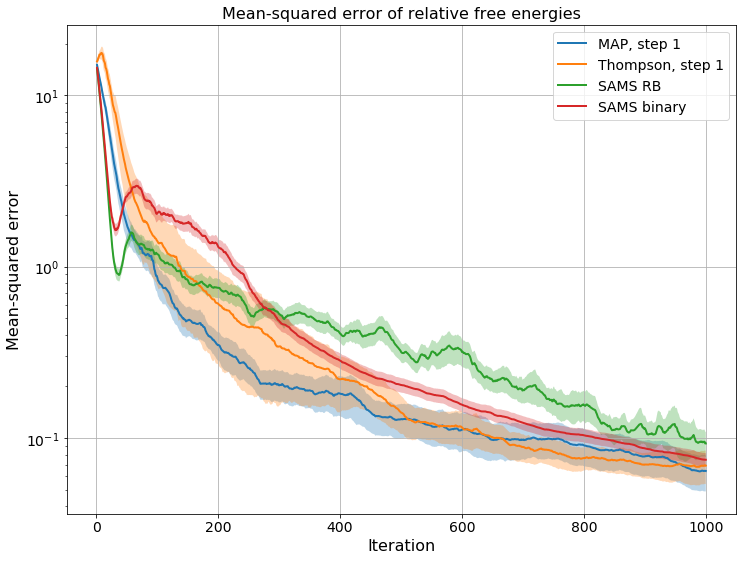

In [24]:
alpha = 0.3           # The transparency of the spread
plt.figure(figsize=(12,9))
# MAP 1 step
last = np.where(np.mean(map1_mse, axis=1) == 0.0)[0][0]
t = np.arange(1, niterations + 1)
standard_error = 2.0 * np.std(map1_mse[0:last,:], axis=0) / np.sqrt(map1_mse.shape[0])
mu = np.mean(map1_mse[0:last,:], axis=0)
upper = np.absolute(mu + standard_error)
lower = np.absolute(mu - standard_error)
plt.semilogy(t, mu, lw=2, label='MAP, step 1')
plt.fill_between(t, lower, upper, alpha=alpha)

# Thompson 1 step
last = np.where(np.mean(map1_mse, axis=1) == 0.0)[0][0]
t = np.arange(1, niterations + 1)
standard_error = 2.0 * np.std(thompson1_mse[0:last,:], axis=0) / np.sqrt(thompson1_mse.shape[0])
mu = np.mean(thompson1_mse[0:last,:], axis=0)
upper = np.absolute(mu + standard_error)
lower = np.absolute(mu - standard_error)
plt.semilogy(t, mu, lw=2, label='Thompson, step 1')
plt.fill_between(t, lower, upper, alpha=alpha)

# SAMS RB
t = np.arange(1, niterations + 1)
standard_error = 2.0 * np.std(rb_mse, axis=0) / np.sqrt(rb_mse.shape[0])
mu = np.mean(rb_mse, axis=0)
upper = mu + standard_error
lower = mu - standard_error
plt.semilogy(t, mu, lw=2, label='SAMS RB')
plt.fill_between(t, lower, upper, alpha=alpha)

# SAMS binary
t = np.arange(1, niterations + 1)
standard_error = 2.0 * np.std(binary_mse, axis=0) / np.sqrt(binary_mse.shape[0])
mu = np.mean(binary_mse, axis=0)
upper = mu + standard_error
lower = mu - standard_error
plt.semilogy(t, mu, lw=2, label='SAMS binary')
plt.fill_between(t, lower, upper, alpha=alpha)

plt.title('Mean-squared error of relative free energies', fontsize=16)
plt.ylabel('Mean-squared error', fontsize=16)
plt.xlabel('Iteration', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()